# Neural Networks

G. Richards (2016), where I found this video series particularly helpful in trying to simplify the explanation https://www.youtube.com/watch?v=bxe2T-V8XRs.

Updates from V. Baker, leaning heavily on Thomas Trappenberg's Fundamentals of Computational Neuroscience(https://web.cs.dal.ca/~tt/fundamentals/)

The field of computational neuroscience studies the functions of the brain in the context of information processing capabilities. Efforts can be roughly dividied into either the (fascinating, but not (yet!) all that useful) exploration of actual brain functions and the (useful, but less interesting) simplified models that can be used for practical data analysis.   

[Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network) are designed with the idea of mimicking the function of real neural networks in the brain.

In the image below the circles on the left represent the **attributes** of our input data, $X$, which here is 3 dimensional.  The circles in the middle represent the neurons.  They take in the information from the input and, based on some criterion decide whether or not to "fire".  The collective results of the neurons in the hidden layer produce the output, $y$, which is represented by the circles on the right, which here is 2 dimensional result.  The lines connecting the circles represent the synapses.  This is a simple example with just one layer of neurons; however, there can be many layers of neurons.
![Cartoon of Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

In more detail:

The job of a synapses is to take input values and multiply them by some weight before passing them to the neuron (hidden layer):

$$z = \sum_i w x_i$$

The neuron then sums up the inputs from all of the synapses connected to it and applies an "activation function".  For example a [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.

$$a = \frac{1}{1+e^{-z}}.$$

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/500px-Logistic-curve.svg.png)

What the neural network does is to learn the weights of the synapses that are needed to produce an accurate model of $y_{\rm train}$.

Rather than think about the inputs individually, we can write this process in matrix form as
$$X W^{(1)} = Z^{(2)}.$$

If $D$ is the number of attributes (here 3) and $H$ is the number of neurons in the hidden layer (here 4), then $X$ is an $N\times D$ matrix, while $W^{(1)}$ is a $D\times H$ matrix.  The result, $Z^{(2)}$, is then an $N\times H$ matrix.

We then apply the activation function to each entry of $Z^{(2)}$ independently: 
$$A^{(2)} = f(Z^{(2)}),$$
where $A^{(2)}$ is the output of the neurons in the hidden layer and is also $N\times H$.

These values are then the inputs for the next set of synapses, where we multiply the inputs by another set of weights, $W^{(2)}:$
$$A^{(2)} W^{(2)} = Z^{(3)},$$

where $W^{(2)}$ is an $H\times O$ matrix and $Z^{(3)}$ is an $N\times O$ matrix with $O$-dimensional output.

Another activation function is then applied to $Z^{(3)}$ to give
$$\hat{y} = f(Z^{(3)}),$$
which is our estimator of $y$.

For example we might have $N=100$ people for which we have measured 
* shoe size
* belt size
* hat size

for whom we know their height and weight.  

Then we are going to use this to predict the height and weight for people where we only know shoe size, belt size, and hat size.


The neural network then essentially boils down to determining the weights, which are usually initialized randomly.

We do that by minimizing the cost function (which compares the true values of $y$ to our predicted values).  Typically:
$$ {\rm Cost} = J = \sum\frac{1}{2}(y - \hat{y})^2.$$

If we just had 1 weight and we wanted to check 1000 possible values, that wouldn't be so bad.  But we have 20 weights, which means checking $20^{1000}$ possible combinations.    Remember the curse of dimensionality?  That might take a while.  Indeed, far, far longer than the age of the Universe.

How about just checking 3 points for each weight and see if we can at least figure out which way is "down hill"?  That's a start.

But we could just as easily rewrite $J$ as
$$ J = \sum\frac{1}{2}\left(y - f\left( f(X W^{(1)}) W^{(2)} \right) \right)^2$$

and then compute
$$\frac{\partial J}{\partial W}$$
in order to determine the slope of the cost function for each weight.  This is the **gradient descent** method.

We'll want $\partial J/\partial W^{(1)}$ and $\partial J/\partial W^{(2)}$ separately.  This allows us to [*backpropagate*](https://en.wikipedia.org/wiki/Backpropagation) the error contributions along each neuron and to change the weights where they most need to be changed.  It is like each observations gets a vote on which way is "down hill".  We compute the vector sum to decide the ultimate down hill direction.

Once we know the down hill direction from the derivative, we update the weights by subtracting a scalar times that derivative from the original weights.  That's obviously much faster than randomly sampling all the possible combinations of weights.  Once the weights are set, then you have your Neural Network classifier/regressor.

![Cartoon of Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

Scikit-Learn has both [unsupervised Neural Network](http://scikit-learn.org/stable/modules/neural_networks_unsupervised.html#neural-networks-unsupervised) and [supervised Neural Network](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised) examples.  Apparently these are new as Jake VanderPlas didn't know about them.

Let's try to use the supervised regression algorithm on the Boston House Price dataset.

In [19]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
#print boston.DESCR

X = boston.data
y = boston.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42) # Complete

[(13, 5), (5, 2), (2, 1)]


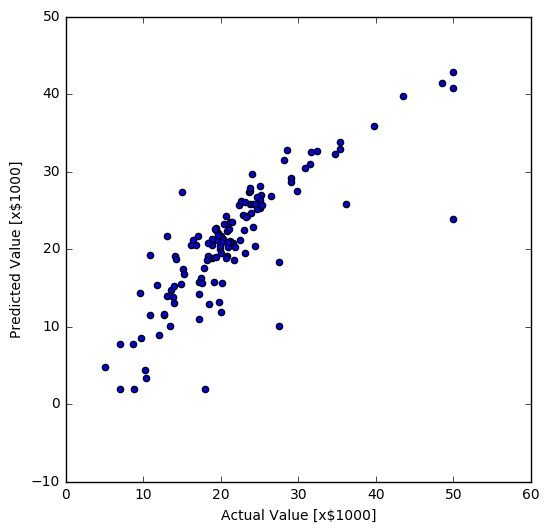

In [22]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(Xtrain, ytrain)

# Look at the weights
print [coef.shape for coef in clf.coefs_]

ypred = clf.predict(Xtest)
#print ypred, ytest

fig = plt.figure(figsize=(6, 6))
plt.scatter(ytest,ypred)
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

Of course, that only predicts the value for a fraction of the data set.  I don't think that I have made it entirely clear how to use cross-validation to get a prediction for the *full* training set, so let's do that now.  We'll use Scikit-Learn's [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict).

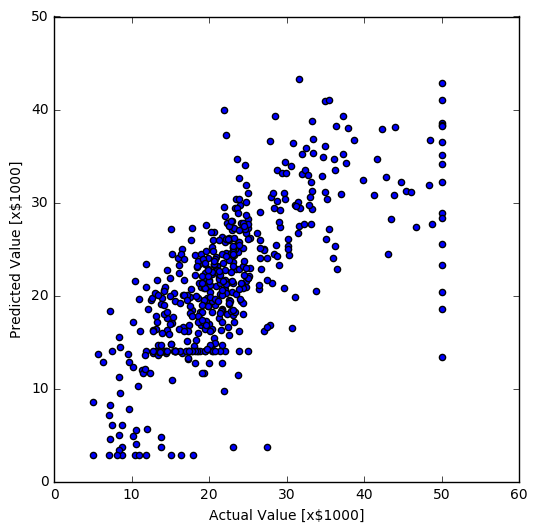

In [31]:
from sklearn.model_selection import cross_val_predict

yCVpred = cross_val_predict(clf, X, y, cv=5) # Complete

fig = plt.figure(figsize=(6, 6))
plt.scatter(y,yCVpred)
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

Let's try to use the multi-layer perceptron classifier on the digits data set. We will use a single hidden layer to keep the training time reasonable.

/Users/gtr/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/gtr/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


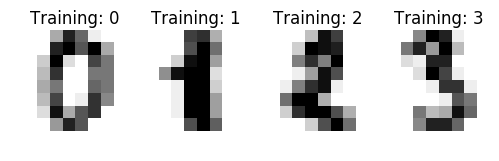

Training set score: 0.901001
Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.92      0.93      0.93        88
          1       0.83      0.90      0.86        91
          2       0.98      0.95      0.96        86
          3       0.91      0.77      0.83        91
          4       0.99      0.93      0.96        92
          5       0.86      0.90      0.88        91
          6       0.97      0.98      0.97        91
          7       0.95      0.90      0.92        89
          8       0.87   

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, cross_validation, neural_network, svm, metrics
from sklearn.neural_network import MLPClassifier 

digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
    
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()
    
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=0, hidden_layer_sizes=(15,) )

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
print("Training set score: %f" % classifier.score(data[n_samples / 2:], digits.target[n_samples / 2:]))

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

This looks pretty good! In general increasing the size of the hidden layer will improve performance at the cost of longer training time. Now try training networks with a hidden layer size of 5 to 20. At what point does performance stop improving?

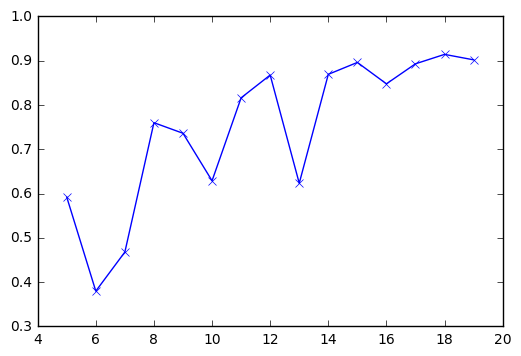

In [2]:
from sklearn.model_selection import cross_val_score

hidden_size = np.arange(5,20)
scores = np.array([])
for sz in hidden_size:
    classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=0, hidden_layer_sizes=(sz,) )
    #classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
    scores = np.append(scores, np.mean(cross_val_score(classifier, data, digits.target, cv=5)))
    
#plt.plot(hidden_size,scores)
fig = plt.figure()
ax = plt.gca()
ax.plot(hidden_size,scores,'x-')
plt.show()


Our basic perceptron can do a pretty good job recognizing handwritten digits, assuming the digits are all centered in an 8x8 image. What happens if we embed the digit images at random locations within a 32x32 image? Try increasing the size of the hidden layer and see if we can improve the performance.

/Users/gtr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


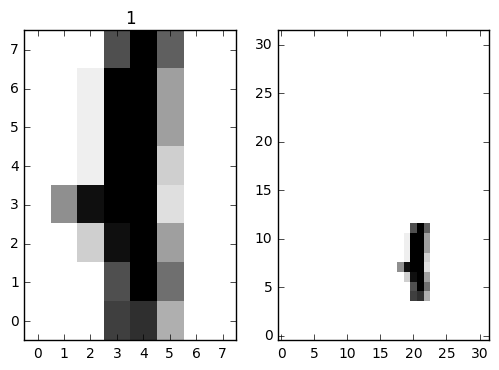

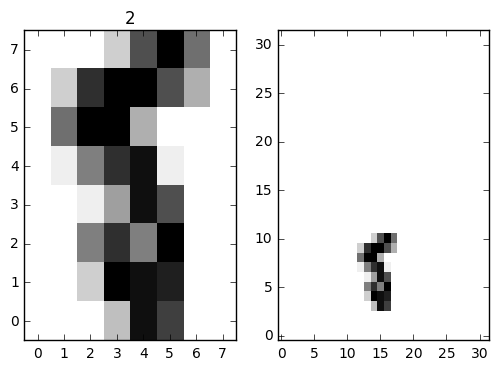

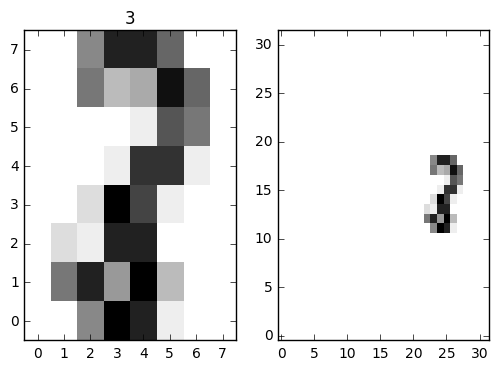

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.16      0.17      0.17        88
          1       0.18      0.20      0.19        91
          2       0.10      0.10      0.10        86
          3       0.19      0.18      0.18        91
          4       0.20      0.20      0.20        92
          5       0.11      0.10      0.11        91
          6       0.21      0.21      0.21        91
          7       0.17      0.19      0.18        89
          8       0.11      0.12      0.12        88
 

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, cross_validation, neural_network, svm, metrics
from sklearn.neural_network import MLPClassifier 

digits = datasets.load_digits()
resize = 32 #Size of larger image to embed the digits
images_ex = np.zeros((digits.target.size,resize,resize))
for index, image in enumerate(digits.images):
    offrow = np.random.randint(low=0,high=resize-8,size=1)
    offcol = np.random.randint(low=0,high=resize-8,size=1)
    images_ex[index,offrow:offrow+8,offcol:offcol+8] = digits.images[index,:,:]
    
for jj in range(1,4):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,2)
    ax1.imshow(images_ex[jj,:,:],aspect='auto',origin='lower',cmap=plt.cm.gray_r, interpolation='nearest')
    ax2 = fig.add_subplot(1,2,1)
    ax2.imshow(digits.images[jj,:,:],aspect='auto',origin='lower',cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(digits.target[jj])
plt.show()
    
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data_ex = images_ex.reshape((n_samples,-1))

# Create a classifier: Multi-layer perceptron
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=0, hidden_layer_sizes=(64,) )

classifier.fit(data_ex[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data_ex[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Well that fell apart quickly! We're at roughly the point where neural networks faded from popularity in the 90s. Perceptrons generated intense interest because they were biologically inspired and could be applied generically to any supervised learning problem. However they weren't extensible to more realistic problems, and for supervised learning there were techniques such as support vector machines that provided better performance and avoided the explosion in training time seen for large perceptrons.

Recent interest in neural networks surged in 2012 when a team using a deep convolutional neural network aceived record results classifying objects in the [ImageNet](http://image-net.org/) data set. Some examples of the types of classification performed on the dataset are shown below.

This is clearly much more sophisticated than our basic perceptron. "Deep" networks consist of tens of layers with thousands of neurons. These large networks have become usabel thanks to two breakthroughs: the use of sparse layers and the power of graphics processing units (GPUs).
Many image processing tasks involve convolving an image with a 2-dimensional kernel as shown below.
![Convolution example](https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/Art/kernel_convolution.jpg)
The sparse layers or convolutional layers in a deep network contain a large number of hidden nodes but very few synapses. The sparseness arises from the relatively small size of a typical convolution kernel (15x15 is a large kernel), so a hidden node representing one output of the convolution is connected to only a few input nodes. Compare this the our previous perceptron, in which every hidden node was connected to every input node.

Even though the total number of connections is greatly reduced in the sparse layers, the total number of nodes and connections in a modern deep network is still enormous. Luckily, training these networks turns out to be a great task for GPU acceleration! Serious work using neural networks is almost always done usign specialized GPU-accelerated platforms.

The Keras framework provides a Python environment for CNN development. Keras uses the TensorFlow module for backend processing.

Installing Keras is simple with pip: pip install tensorflow pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

#Create a model
model = Sequential()

#Use two sparse layers to learn useful, translation-invariant features
model.add(Convolution2D(32,7,7,border_mode='valid',input_shape=(32,32,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32,5,5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#Add dense layers to do the actual classification
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

#Keras has some particular requirements for data formats...
dataX = images_ex.reshape(images_ex.shape[0],images_ex.shape[1],images_ex.shape[2],1)
dataY = np_utils.to_categorical(digits.target)

#Train the model. We get a summary of performance after each training epoch
model.fit(dataX, dataY, validation_split=0.1, batch_size=128, nb_epoch=10)